In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, recall_score
from sklearn.neural_network import MLPClassifier

# Load the dataset
fetal_health_df = pd.read_csv('fetal_health.csv')

# Display the first few rows of the dataset
print(fetal_health_df.head())

# Check for missing values
missing_values = fetal_health_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Define the numerical columns (all columns except 'fetal_health')
numerical_features = fetal_health_df.columns.difference(['fetal_health']).tolist()

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

# Separate features and target
X = fetal_health_df.drop('fetal_health', axis=1)
y = fetal_health_df['fetal_health']

# Apply the preprocessing pipeline to the features
X_preprocessed = preprocessor.fit_transform(X)

# Check the class distribution of the target variable
class_distribution = y.value_counts(normalize=True) * 100
print("Class distribution (%):\n", class_distribution)

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0             132          0.006             0.0                 0.006   
1             133          0.003             0.0                 0.008   
2             134          0.003             0.0                 0.008   
3             132          0.007             0.0                 0.008   
4             134          0.001             0.0                 0.010   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.003                   0.0                     0.000   
1                0.003                   0.0                     0.000   
2                0.003                   0.0                     0.000   
3                0.000                   0.0                     0.000   
4                0.009                   0.0                     0.002   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               17

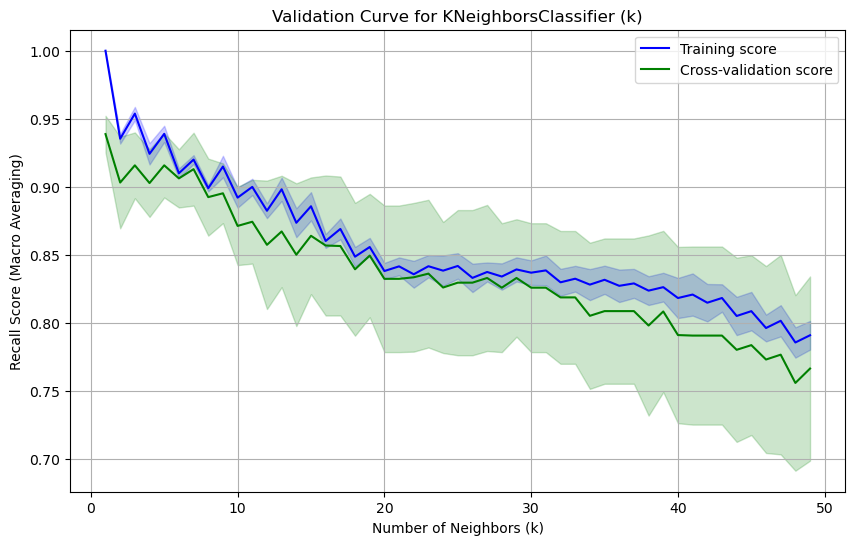

In [68]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer, recall_score
from sklearn.neighbors import KNeighborsClassifier

# Define the range for k
k_range = range(1, 50)

# Create a scorer for Recall
recall_scorer = make_scorer(recall_score, average='macro')

# Validation curve for k
train_scores, valid_scores = validation_curve(
    KNeighborsClassifier(),
    X_train, y_train,
    param_name='n_neighbors',
    param_range=k_range,
    cv=5,
    scoring=recall_scorer,
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_mean, label='Training score', color='blue')
plt.plot(k_range, valid_mean, label='Cross-validation score', color='green')
plt.fill_between(k_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(k_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')
plt.title('Validation Curve for KNeighborsClassifier (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Recall Score (Macro Averaging)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

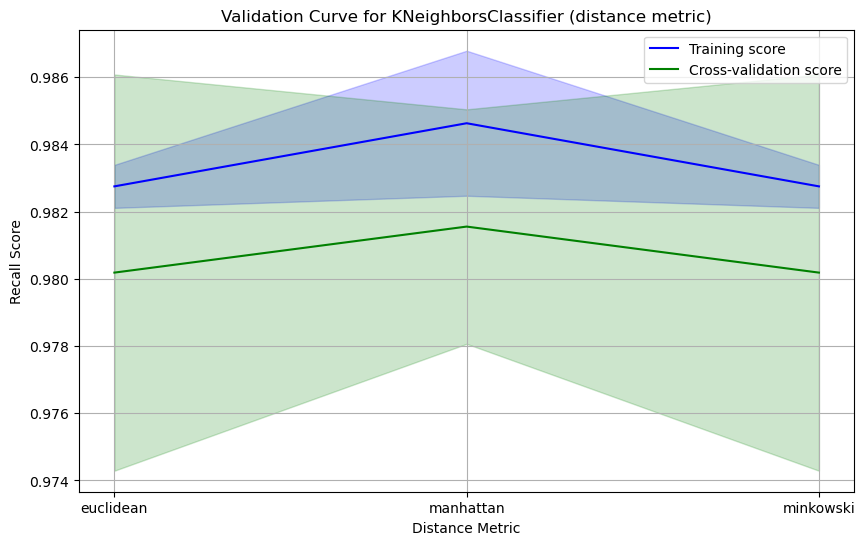

In [148]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer, recall_score
from sklearn.neighbors import KNeighborsClassifier

# Define the range for distance metrics
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

# Create a scorer for Recall
recall_scorer = make_scorer(recall_score, average='weighted')

# Validation curve for distance metrics
train_scores, valid_scores = validation_curve(
    KNeighborsClassifier(n_neighbors=7),
    X_train, y_train,
    param_name='metric',
    param_range=distance_metrics,
    cv=5,
    scoring=recall_scorer,
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(distance_metrics, train_mean, label='Training score', color='blue')
plt.plot(distance_metrics, valid_mean, label='Cross-validation score', color='green')
plt.fill_between(distance_metrics, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(distance_metrics, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')
plt.title('Validation Curve for KNeighborsClassifier (distance metric)')
plt.xlabel('Distance Metric')
plt.ylabel('Recall Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


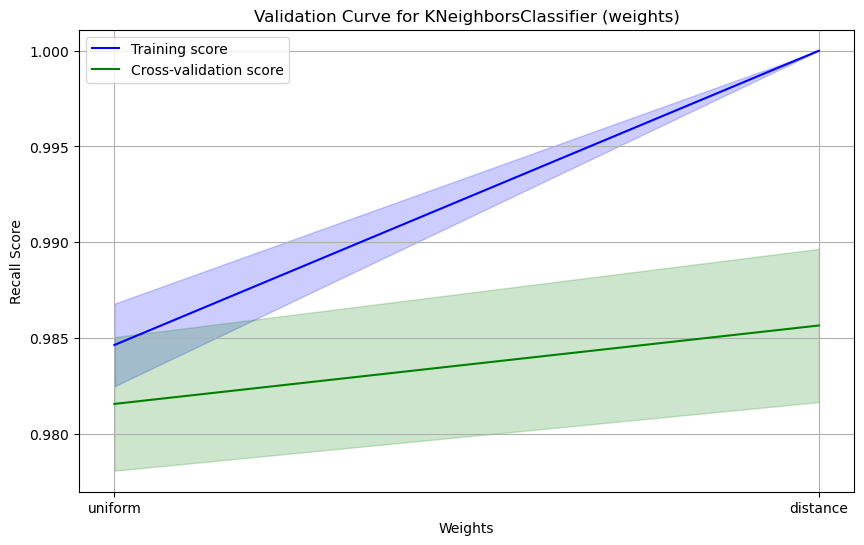

In [152]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer, recall_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the range for weights
weights = ['uniform', 'distance']

# Create a scorer for Recall
recall_scorer = make_scorer(recall_score, average='weighted')

# Validation curve for weights
train_scores, valid_scores = validation_curve(
    KNeighborsClassifier(n_neighbors=7, metric='manhattan'),  # Use the optimal k and distance metric
    X_train, y_train,
    param_name='weights',
    param_range=weights,
    cv=5,
    scoring=recall_scorer,
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(weights, train_mean, label='Training score', color='blue')
plt.plot(weights, valid_mean, label='Cross-validation score', color='green')
plt.fill_between(weights, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(weights, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')
plt.title('Validation Curve for KNeighborsClassifier (weights)')
plt.xlabel('Weights')
plt.ylabel('Recall Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


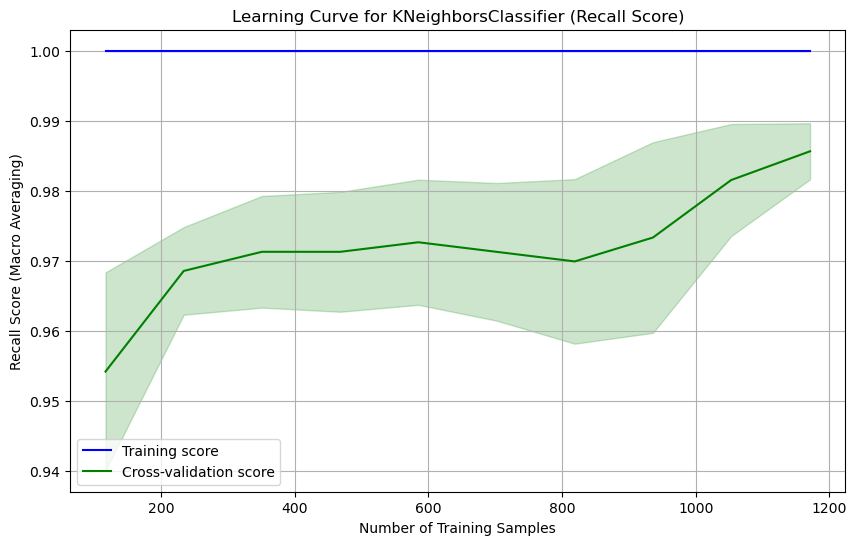

In [154]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, recall_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Define the model with the optimal hyperparameters
knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='distance')

# Create a scorer for Recall
recall_scorer = make_scorer(recall_score, average='weighted')

# Calculate learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    knn, X_train, y_train, cv=5, scoring=recall_scorer,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, valid_mean, label='Cross-validation score', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Recall Score (Macro Averaging)')
plt.title('Learning Curve for KNeighborsClassifier (Recall Score)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


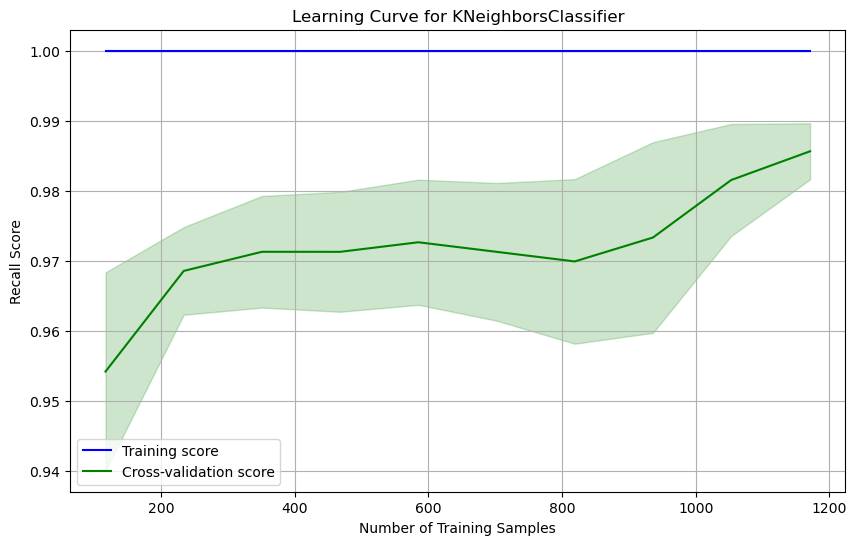

In [118]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, recall_score
from sklearn.neighbors import KNeighborsClassifier

# Create a scorer for Recall
recall_scorer = make_scorer(recall_score, average='weighted')

# Define the KNN model with the tuned hyperparameters
final_knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='distance')

# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate the learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    final_knn, X_train, y_train, 
    train_sizes=train_sizes, 
    cv=5, 
    scoring=recall_scorer,
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, valid_mean, label='Cross-validation score', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')
plt.title('Learning Curve for KNeighborsClassifier')
plt.xlabel('Number of Training Samples')
plt.ylabel('Recall Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


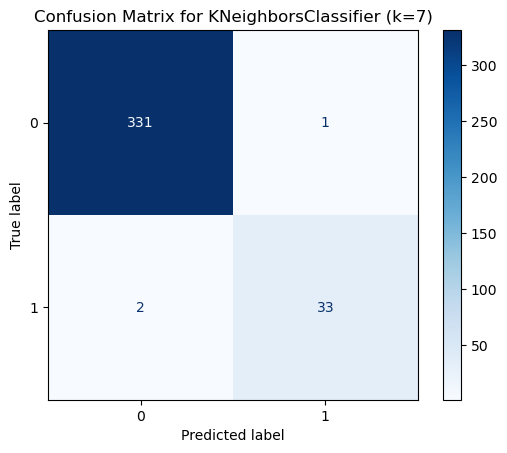

In [142]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

# Define the model with k = 7
knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='distance')

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_val)

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNeighborsClassifier (k=7)')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 50),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Initialize the GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit the model with GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)